In [123]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [124]:
pd.set_option('display.mpl_style', 'default')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [125]:
consumerKey = 'WMfhG48E6yDyaPDsHNpZRgPb3'
consumerSecret = 'c8c1WInH0mbajnG462cQg3bL4iipn2WEkuRpnPCQkR9LQbASYx'

#Use tweepy.OAuthHandler to create an authentication using the given key and secret

auth = tweepy.OAuthHandler(consumer_key=consumerKey, 
    consumer_secret=consumerSecret)

#Connect to the Twitter API using the authentication
api = tweepy.API(auth, wait_on_rate_limit=True)

In [126]:
%time
results = []
for tweet in tweepy.Cursor(api.search, q='%23Bitcoin').items(5000):
    results.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23Ripple').items(5000):
    results.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23Litecoin').items(5000):
    results.append(tweet)
for tweet in tweepy.Cursor(api.search, q='%23Crypto').items(5000):
    results.append(tweet)

Wall time: 1 ms


In [128]:
def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet in tweets]
    DataSet['coordinates'] = [tweet.coordinates for tweet in tweets]

    return DataSet

#Pass the tweets list to the above function to create a DataFrame
DataSet = toDataFrame(results)
# creating a CSV file 
DataSet.to_csv('./crypto_tweetsCSV', sep='\t', index=False)

In [141]:
DataSetLocation = DataSet[DataSet.userLocation.notnull()]
DataSetLikes = DataSet[DataSet.tweetFavoriteCt.notnull()]
DataSetRetweets = DataSet[DataSet.tweetRetweetCt.notnull()]
DataSetCoordinates = DataSet[DataSet.coordinates.notnull()]
# top 10 user locations
user_location = DataSetLocation['userLocation'].value_counts()[:10]

Text(0.5,1,'Top 10 areas generating tweets about #Bitcoin, #Ripple, #Litecoin, #Crypto')

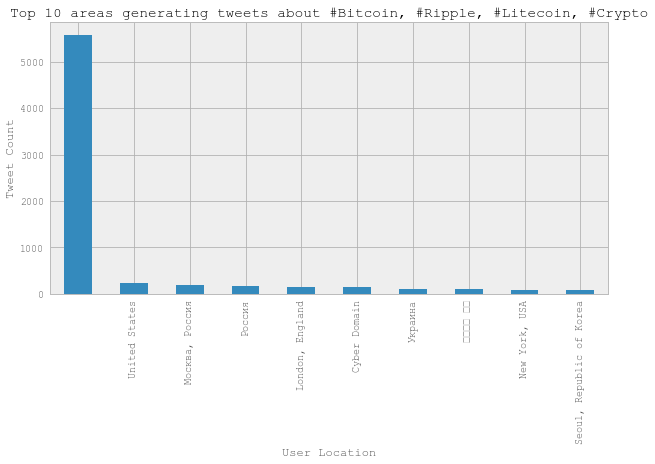

In [135]:
plt.rcParams['figure.figsize'] = (10, 5)
user_location.plot(kind='bar')
plt.xlabel('User Location')
plt.ylabel('Tweet Count')
plt.title('Top 10 areas generating tweets about #Bitcoin, #Ripple, #Litecoin, #Crypto')

In [131]:
# topten popular bitcoin tweets
# Top10DataSetLikes=
coor_frame=DataSet['coordinates'].to_frame()

In [132]:
import folium
from folium.plugins import HeatMap
from folium import plugins
from IPython.display import HTML, display
# Build the basic map 
cryptoheatmp = folium.Map(location=(40.447354,-79.943493), zoom_start=2)

y=[i for i in DataSetCoordinates['coordinates']]
z=[i for i,j in enumerate(y)]

coor_list=[]
for i in range(len(z)):
    x=y[i]['coordinates']
    coor_list.append(x)

# Same as before, add the points from the tweets that are geolocated
# cryptoheatmp.add_child(plugins.HeatMap([(coor_list[j][1],
#                                                coor_list[j][0]) 
#                                                for j in range(len(coor_list))]))
HeatMap([(coor_list[j][1],coor_list[j][0]) for j in range(len(coor_list))]).add_to(cryptoheatmp)
# Save the map to the local directory
cryptoheatmp.save("./crypto_heatmap.html")


In [133]:
%%HTML
<iframe width='100%'height='450' src="./crypto_heatmap.html"></iframe>

In [166]:
# most talked about tweets 
user_retweets=DataSetRetweets.sort_values(by=['tweetRetweetCt'],ascending=False)[:10]
display((user_retweets[['userName','tweetText','tweetRetweetCt']].reset_index(drop=True)).style)

,userName,tweetText,tweetRetweetCt
0,Chermen Dzboy,RT @CharlieShrem: Time to buy #bitcoin https://t.co/54NeolC08I,8722
1,Sebastian Sutherland,RT @earthtokens: VIDEO: #EARTH #Token & the #Natural #Asset #Exchange introduction https://t.co/yQQYX3h7rn #ico #ethereum #bitcoin #crypto…,4631
2,Adam MacDonald,RT @earthtokens: VIDEO: #EARTH #Token & the #Natural #Asset #Exchange introduction https://t.co/yQQYX3h7rn #ico #ethereum #bitcoin #crypto…,4631
3,Jake Alsop,RT @earthtokens: VIDEO: #EARTH #Token & the #Natural #Asset #Exchange introduction https://t.co/yQQYX3h7rn #ico #ethereum #bitcoin #crypto…,4631
4,Edward Henderson,RT @earthtokens: VIDEO: #EARTH #Token & the #Natural #Asset #Exchange introduction https://t.co/yQQYX3h7rn #ico #ethereum #bitcoin #crypto…,4631
5,Neil Young,RT @earthtokens: VIDEO: #EARTH #Token & the #Natural #Asset #Exchange introduction https://t.co/yQQYX3h7rn #ico #ethereum #bitcoin #crypto…,4631
6,Lavern Pantoja,RT @earthtokens: VIDEO: #EARTH #Token & the #Natural #Asset #Exchange introduction https://t.co/yQQYX3h7rn #ico #ethereum #bitcoin #crypto…,4631
7,Julian Dickens,RT @earthtokens: VIDEO: #EARTH #Token & the #Natural #Asset #Exchange introduction https://t.co/yQQYX3h7rn #ico #ethereum #bitcoin #crypto…,4631
8,Simon Bailey,RT @earthtokens: VIDEO: #EARTH #Token & the #Natural #Asset #Exchange introduction https://t.co/yQQYX3h7rn #ico #ethereum #bitcoin #crypto…,4631
9,John Skinner,RT @earthtokens: VIDEO: #EARTH #Token & the #Natural #Asset #Exchange introduction https://t.co/yQQYX3h7rn #ico #ethereum #bitcoin #crypto…,4631
